# SUPPORT VECTOR MATRICES (SVM)

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [395]:
from scipy.io import loadmat
from sklearn.svm import SVC

# 1. SVM with Linear Kernals (Linear Decision Boundary)

In [396]:
data1 = loadmat('ex6data1.mat')
sets = np.append(data1['X'], data1['y'], axis=1)
X = data1['X']
y = data1['y']

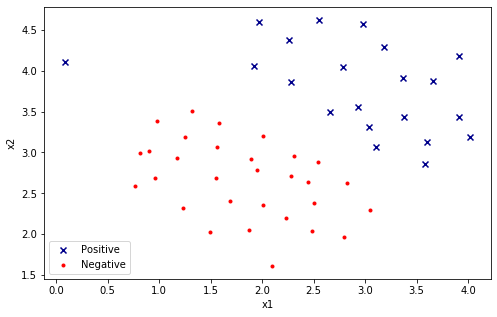

In [397]:
pos = sets[sets[:,2]==1][:,0:2]
neg = sets[sets[:,2]==0][:,0:2]

sc_fig, ex1 = plt.subplots(1,1, figsize=(8,5))
ex1.scatter(pos[:,0], pos[:,1], marker='x', color='darkblue', label='Positive')
ex1.scatter(neg[:,0], neg[:,1], marker='.', color='red', label='Negative')

ex1.set_xlabel('x1')
ex1.set_ylabel('x2')
ex1.legend(loc='lower left')
plt.show()


In [398]:
exp1 = SVC(C=1, kernel='linear', tol=1e-3)
exp2 = SVC(C=100, kernel='linear', tol=1e-3)

In [399]:
y = y.ravel()
exp1.fit(X,y)
exp2.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [400]:
# MESHGRID CONSTRUCTION FUNCTION

def build_mesh(x, y, d):
    xm = np.linspace(x.min()-0.5, x.max()+0.5, d)
    ym = np.linspace(y.min()-0.5, y.max()+0.5, d)
    xx, yy = np.meshgrid(xm, ym)
    return xx, yy

D:\Python_Work\PYTHON_INSTALLATION\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':
D:\Python_Work\PYTHON_INSTALLATION\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


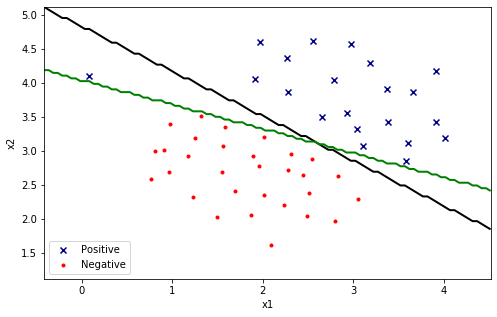

In [401]:
x1 = X[:,0]
x2 = X[:,1]

xx, yy = build_mesh(x1, x2, d=100)

# Decision boundary is nothing but prediction for the meshgrid.

fz1 = exp1.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
ex1.contour(xx, yy, fz1, [0], colors='black', linewidths = 2,zorder=0)

fz2 = exp2.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
ex1.contour(xx, yy, fz2, [0], colors='green', linewidths = 2,zorder=0)

ex1.legend(loc='lower left')
sc_fig

# 2. SVM with Gaussian Kernals (Non-Linear Decision Boundary)

### Gaussian Kernal Function

In [402]:
import math

def gaus_ker(x1, x2, sigma):
    f = math.exp(-1 * sum(abs(x1-x2)**2)/(2 * sigma**2))
    return f

#Check
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2

print(f'The Gaussian Kernal function for the above example is {gaus_ker(x1,x2,sigma)}')

The Gaussian Kernal function for the above example is 0.32465246735834974


### RBF Gaussian SVM Implementation
<blockquote>
• Large C = High Variance<br>
• Explanation of gamma (sigma):<br>
  gamma is the inverse of radius of influence of landmarks (training sets).<br>Therefore, a high gamma means that radius of
    influence of a landmark is very low. This means that testing sets only near to it will be considered for classification.<br> In other words, HIGH GAMMA = HIGH VARIANCE (OVERFITTING).<br><br>
    Low gamma/ C = 0-1<br>
    Intermediate gamma/ C = 1-100<br>
    High gamma/ C = 100 - 10000<br><br>
**Note: Math behind SVM can be different in different softwares. So, gamma has to be tuned accordingly.

In [403]:
data2 = loadmat('ex6data2.mat')
sets2 = np.append(data2['X'], data2['y'],axis=1)
X = data2['X']
y = data2['y']

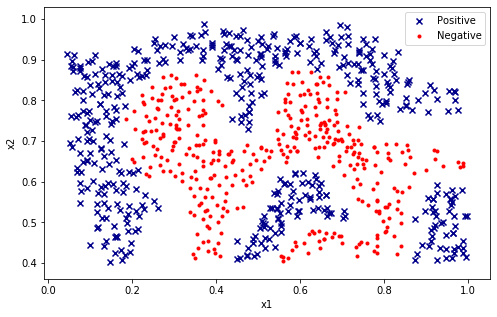

In [404]:
pos2 = sets2[sets2[:,2]==1][:,0:2]
neg2 = sets2[sets2[:,2]==0][:,0:2]

sc_fig2, ex2 = plt.subplots(1,1,figsize=(8,5))
ex2.scatter(pos2[:,0], pos2[:,1], marker='x', color='darkblue', label='Positive')
ex2.scatter(neg2[:,0], neg2[:,1], marker='.', color='red', label='Negative')

ex2.set_xlabel('x1')
ex2.set_ylabel('x2')
ex2.legend(loc='upper right')
plt.show()

In [405]:
ex2_1 = SVC(C=10, kernel='rbf', gamma = 10, tol=1e-3, verbose=3)

y = y.ravel()

ex2_1.fit(X,y)

[LibSVM]

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=3)

D:\Python_Work\PYTHON_INSTALLATION\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
D:\Python_Work\PYTHON_INSTALLATION\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'color'
  


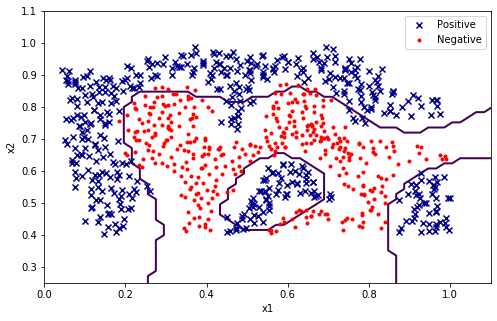

In [406]:
x1 = X[:,0]
x2 = X[:,1]

xx, yy = build_mesh(x1, x2, d=100)
fz1 = ex2_1.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
ex2.contour(xx, yy, fz1, [0], color='black', linewidths = 2,zorder=0)

ex2.set_xlim(0,1.1)
ex2.set_ylim(0.25,1.1)

sc_fig2

# 3. Classification and Cross-Validation Model using SVM

In [407]:
data3 = loadmat('ex6data3.mat')
X = data3['X']
y = data3['y']
sets3 = np.append(X,y,axis=1)

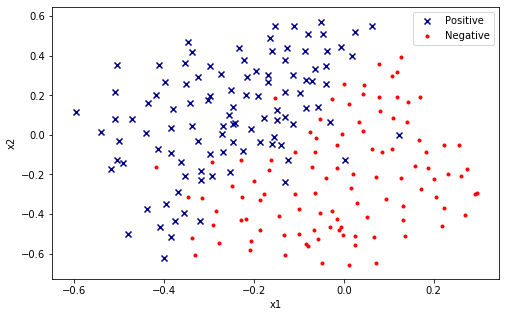

In [408]:
pos = sets3[sets3[:,2]==1][:,0:2]
neg = sets3[sets3[:,2]==0][:,0:2]

sc_fig3, ex3 = plt.subplots(1,1,figsize=(8,5))
ex3.scatter(pos[:,0], pos[:,1], marker='x', color='darkblue', label='Positive')
ex3.scatter(neg[:,0], neg[:,1], marker='.', color='red', label='Negative')

ex3.set_xlabel('x1')
ex3.set_ylabel('x2')
ex3.legend(loc='upper right')
plt.show()

### Iteration on C and gamma

In [409]:
Xval = data3['Xval']
yval = data3['yval']

y = y.ravel()
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

C_used = []
gamma_used = []
pct_correct = []

for i in range(len(C)):
    for j in range(len(gamma)):
        svm_mod = SVC(C = C[i], kernel='rbf', gamma = gamma[j] , tol=1e-3)
        svm_mod.fit(X,y)
        
        C_used.append(C[i])
        gamma_used.append(gamma[j])
        
        pred = svm_mod.predict(Xval)
        
        corrects = 0
        for m in range(len(yval)):
            if pred[m] == yval[m]:
                corrects = corrects + 1
        pct_correct.append((corrects/len(yval))*100)
        
print('The number of C and gamma iteration models run are',len(C_used))
print(f'The most accurate model prediction is {max(pct_correct)}% which is iteration number \
{pct_correct.index(max(pct_correct))+1}.') 
print(f'\nIter 48 (List index 47): Value of C = {C_used[47]} and Value of gamma = {gamma_used[47]}')

The number of C and gamma iteration models run are 64
The most accurate model prediction is 96.5% which is iteration number 48.

Iter 48 (List index 47): Value of C = 3 and Value of gamma = 30


### Final Prediction Model

[LibSVM]

D:\Python_Work\PYTHON_INSTALLATION\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':
D:\Python_Work\PYTHON_INSTALLATION\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':


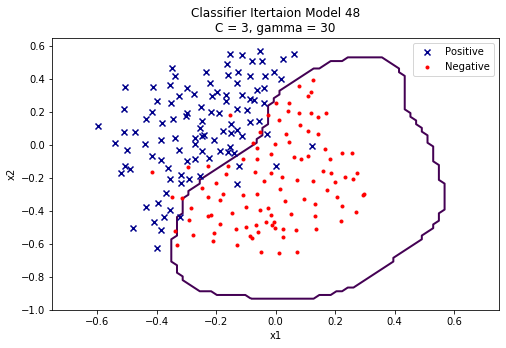

In [410]:
svm_mod = SVC(C = 3, kernel='rbf', gamma = 30 , tol=1e-3, verbose=True)
svm_mod.fit(X,y)

x1 = X[:,0]
x2 = X[:,1]

xx, yy = build_mesh(x1, x2, d=100)
fz = svm_mod.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
ex3.contour(xx, yy, fz, [0], color='black', linewidths = 2,zorder=0)

ex3.set_xlim(-0.75,0.75)
ex3.set_ylim(-1,0.65)
ex3.set_title('Classifier Itertaion Model 48\nC = 3, gamma = 30')

sc_fig3